In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset from a specific location as a DataFrame
dataset = pd.read_csv(r'C:\Users\abact\BC-Project\data\clean_data.csv')
dataset

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75,143.100,7.1,86.6,156266.0,128854.0,2.93,6.26,604.0,315.0,NaN
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75,143.800,7.1,85.6,158979.0,127395.0,2.92,5.97,701.0,315.0,0.00
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75,144.300,7.0,81.5,160127.0,130212.0,3.01,5.96,653.0,317.0,0.00
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25,144.500,6.9,77.0,162816.0,128111.0,3.04,5.81,655.0,317.0,-0.50
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25,145.000,6.7,77.9,163258.0,127233.0,3.01,5.36,726.0,319.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-09-21,0.75,0.75,0.0,3.25,297.987,3.7,59.9,601983.0,278512.0,3.21,3.98,577.0,362.0,0.75
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00,298.598,3.6,56.8,593090.0,269783.0,4.04,3.89,582.0,363.0,0.75
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50,298.990,3.5,59.7,588540.0,281966.0,4.23,3.62,636.0,363.0,0.50
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75,301.648,3.6,67.0,600669.0,270825.0,4.54,3.75,631.0,363.0,0.25


### Assigning Positive and Negative scores to FOMC minutes, as well as counting frequency and observing trends over time of Positive and Negative Scores-

In [3]:
# Load Loughran and McDonald Sentiment Word List into a dictionary
sentiment_word_list = {}
positive_word_frequencies = {}
negative_word_frequencies = {}

with open("C:/Users/abact/Downloads/Loughran-McDonald_MasterDictionary_1993-2021.csv", 'r') as file:
    # Skip the header line
    next(file)

    for line in file:
        # Split the line by comma
        values = line.strip().split(',')

        # Extract the necessary values
        word = values[0].lower()
        positive = float(values[8])  # Positive column index is 8
        negative = float(values[9])  # Negative column index is 9

        # Assign the word as positive or negative based on the positive or negative values
        if positive > 0:
            sentiment_word_list[word] = 1
        elif negative > 0:
            sentiment_word_list[word] = -1

# Calculate net sentiment score for each datapoint
net_sentiment_scores = []
positive_word_frequencies = []
negative_word_frequencies = []

for datapoint in dataset['Preprocessed Text']:
    words = datapoint.lower().split()  # Tokenize the text into words
    net_sentiment = sum(sentiment_word_list.get(word, 0) for word in words)
    net_sentiment_scores.append(net_sentiment)
    
    positive_words = sum(1 for word in words if sentiment_word_list.get(word, 0) == 1)
    positive_word_frequencies.append(positive_words)
    
    negative_words = sum(1 for word in words if sentiment_word_list.get(word, 0) == -1)
    negative_word_frequencies.append(negative_words)

# Add 'Net Sentiment Score', 'Positive Frequency', and 'Negative Frequency' as new columns in the dataset
dataset['Net Sentiment Score'] = net_sentiment_scores
dataset['Positive Frequency'] = positive_word_frequencies
dataset['Negative Frequency'] = negative_word_frequencies

# Create 'Sentiment Label' column based on the net sentiment score
dataset['Sentiment Label'] = ['Positive' if score > 0 else 'Negative' for score in net_sentiment_scores]

In [4]:
dataset

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,...,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff,Net Sentiment Score,Positive Frequency,Negative Frequency,Sentiment Label
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75,143.100,7.1,86.6,...,128854.0,2.93,6.26,604.0,315.0,NaN,-36,106,142,Negative
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75,143.800,7.1,85.6,...,127395.0,2.92,5.97,701.0,315.0,0.00,2,89,87,Positive
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75,144.300,7.0,81.5,...,130212.0,3.01,5.96,653.0,317.0,0.00,-33,62,95,Negative
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25,144.500,6.9,77.0,...,128111.0,3.04,5.81,655.0,317.0,-0.50,-65,88,153,Negative
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25,145.000,6.7,77.9,...,127233.0,3.01,5.36,726.0,319.0,0.00,-7,61,68,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-09-21,0.75,0.75,0.0,3.25,297.987,3.7,59.9,...,278512.0,3.21,3.98,577.0,362.0,0.75,-27,71,98,Negative
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00,298.598,3.6,56.8,...,269783.0,4.04,3.89,582.0,363.0,0.75,-34,69,103,Negative
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50,298.990,3.5,59.7,...,281966.0,4.23,3.62,636.0,363.0,0.50,-21,77,98,Negative
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75,301.648,3.6,67.0,...,270825.0,4.54,3.75,631.0,363.0,0.25,-26,80,106,Negative


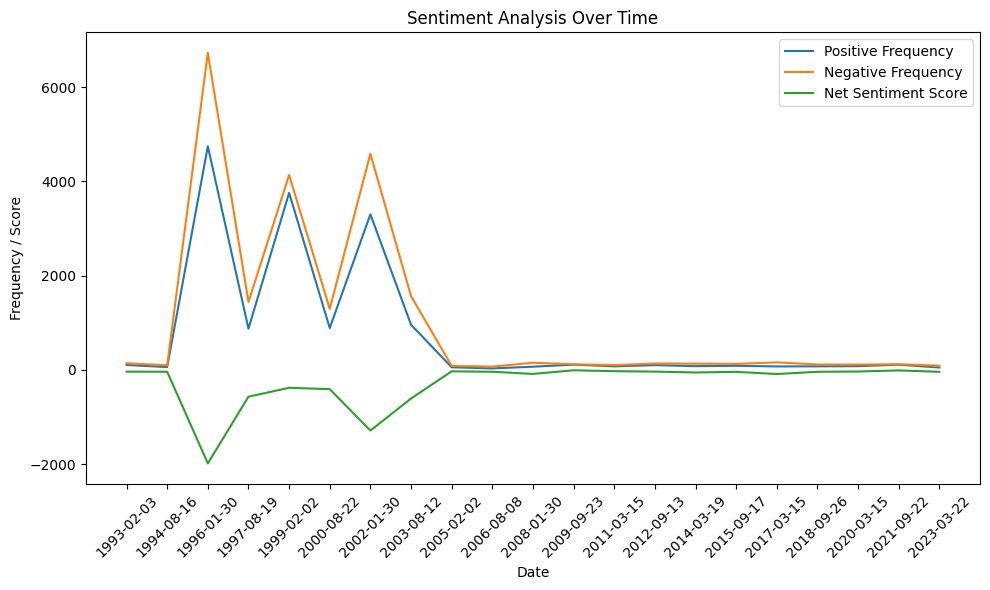

In [5]:
# Filter dataset to include every 12th date
filtered_dataset = dataset[::12]

# Extract the required data
dates = filtered_dataset['Date']
positive_frequency = filtered_dataset['Positive Frequency']
negative_frequency = filtered_dataset['Negative Frequency']
net_sentiment_score = filtered_dataset['Net Sentiment Score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, positive_frequency, label='Positive Frequency')
plt.plot(dates, negative_frequency, label='Negative Frequency')
plt.plot(dates, net_sentiment_score, label='Net Sentiment Score')

plt.xlabel('Date')
plt.ylabel('Frequency / Score')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

In [28]:
last_20_positive = dataset['Positive Frequency'][-20:]
last_20_negative= dataset['Negative Frequency'][-20:]
last_20_net = dataset['Net Sentiment Score'][-20:]

combined_df = pd.concat([last_20_positive, last_20_negative, last_20_net], axis=1)
combined_df

,Positive Frequency,Negative Frequency,Net Sentiment Score
221,105,129,-24
222,112,107,5
223,155,131,24
224,126,106,20
225,118,123,-5
226,127,140,-13
227,142,171,-29
228,112,122,-10
229,112,102,10
230,116,143,-27


In [37]:
# Create dictionaries to store positive and negative word frequencies per row
positive_word_frequencies = {}
negative_word_frequencies = {}

# Iterate over each row in the preprocessed text
for index, datapoint in dataset['Preprocessed Text'].iteritems():
    words = datapoint.lower().split()  # Tokenize the text into words

    # Iterate over each word and check its sentiment
    for word in words:
        if word in sentiment_word_list:
            sentiment = sentiment_word_list[word]
            if sentiment == 1:
                positive_word_frequencies[word] = positive_word_frequencies.get(word, 0) + 1
            elif sentiment == -1:
                negative_word_frequencies[word] = negative_word_frequencies.get(word, 0) + 1

# Get the 10 most frequent positive words
top_positive_words = sorted(positive_word_frequencies, key=positive_word_frequencies.get, reverse=True)[:10]

# Get the 10 most frequent negative words
top_negative_words = sorted(negative_word_frequencies, key=negative_word_frequencies.get, reverse=True)[:10]

print("Top 10 Positive Words:")
for word in top_positive_words:
    print(f"{word}: {positive_word_frequencies[word]}")

print("\nTop 10 Negative Words:")
for word in top_negative_words:
    print(f"{word}: {negative_word_frequencies[word]}")


C:\Users\abact\AppData\Local\Temp\ipykernel_12588\1660354915.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, datapoint in dataset['Preprocessed Text'].iteritems():


Top 10 Positive Words:
stability: 10691
good: 9887
gain: 9566
strong: 8211
strength: 6654
favorable: 5772
despite: 4858
positive: 3594
strengthening: 3244
improvement: 3028

Top 10 Negative Words:
risk: 19105
somewhat: 15138
could: 14166
might: 12763
anticipated: 9005
suggested: 8972
appeared: 8182
may: 8116
uncertainty: 8002
possible: 4184


### We also want to understand the relative number of positive and negative words in each speech. Just knowing the number of positive and negative words alone doesn't tell us much about the scope of the net sentimentality.

In [38]:
# Create an empty list to store the word counts
word_count = []

# Iterate over each row in the preprocessed text
for datapoint in dataset['Preprocessed Text']:
    words = datapoint.lower().split()  # Tokenize the text into words
    num_words = len(words)  # Calculate the number of words in the row
    word_count.append(num_words)  # Add the word count to the list

# Print the word counts
print("Word Count:")
for count in word_count:
    print(count)

Word Count:
6085
3520
3059
4268
2859
3045
3582
3502
6108
3871
3871
4022
2971
3108
3368
3443
4827
3060
4603
2692
4141
2950
3022
2988
231389
15282
16975
19898
20140
19661
20171
19941
56266
51364
52203
71523
49348
42634
55571
25738
246599
48807
62890
78222
57291
65547
91559
55537
165012
49878
49643
80204
86735
46981
49838
57214
171965
55666
43131
49729
44929
38460
59217
46098
198938
56315
56315
61389
56000
42043
50672
48214
151380
51826
40666
85917
94274
65178
108403
63792
138617
35232
3987
60789
42013
43637
48106
40006
15463
34611
3135
2967
35614
2628
2330
2536
2732
4384
2614
2727
2141
2299
2371
4102
2320
2848
35983
3014
2399
2794
2399
2703
4649
2616
2842
2624
2829
3543
7057
48062
6996
3793
8166
3252
2869
4968
4736
4015
18119
3906
5095
4318
4457
8600
4879
4025
6507
4247
4849
4034
3627
4338
4042
6191
4080
4664
4240
4010
4979
4576
6732
4619
3998
4539
4914
4421
4821
4181
4641
6671
4633
4439
5180
4624
4835
4459
5414
7247
5145
3746
4871
5107
5140
5335
7768
4183
5288
4918
5201
5447
4993
4806
5

In [39]:
# Calculate the proportions of positive words per minute for each row
positive_words_per_minute = dataset['Positive Frequency'] / word_count

# Calculate the proportions of negative words per minute for each row
negative_words_per_minute = dataset['Negative Frequency'] / word_count

# Add the calculated columns to the dataset
dataset['Proportion Positive Words'] = positive_words_per_minute
dataset['Proportion Negative Words'] = negative_words_per_minute
dataset['Word Count'] = word_count

In [40]:
# Select the last 7 columns
last_7_columns = dataset.iloc[:, -7:]

# Calculate summary statistics
summary = last_7_columns.describe()

# Display the summary statistics
print(summary)

       Positive Frequency  Negative Frequency  Standardized Sentiment Score  \
count          241.000000          241.000000                    241.000000   
mean           449.107884          652.659751                      0.752044   
std            778.324288         1075.912586                      0.343809   
min             33.000000           36.000000                     -1.000000   
25%             73.000000          103.000000                      0.817644   
50%             95.000000          139.000000                      0.907344   
75%            451.000000          816.000000                      0.926072   
max           5233.000000         6779.000000                      1.000000   

       Proportion Positive Words  Proportion Negative Words     Word Count  
count                 241.000000                 241.000000     241.000000  
mean                    0.018770                   0.027514   21659.730290  
std                     0.004213                   0.0055

### While Net Sentiment Score will suffice for model building, it is hard to interpret. As such, we will standardize the Net Sentiment Score around 0 and evaluate the magnitude of positivity and negativity around a 0 mean with standard deviations used to calculate magnitude above or below mean

In [42]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Reshape the Net Sentiment Score column
net_sentiment_scores = dataset["Net Sentiment Score"].values.reshape(-1, 1)

# Scale the scores to the range of -1 to 1
scaled_scores = scaler.fit_transform(net_sentiment_scores)

# Add a new column for the scaled scores
dataset["Standardized Sentiment Score"] = scaled_scores

In [43]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(dataset["Standardized Sentiment Score"])

0      0.917201
1      0.954657
2      0.920158
3      0.888615
4      0.945786
5      0.940858
6      0.940858
7      0.955643
8      0.941843
9      0.911286
10     0.911286
11     0.892558
12     0.915229
13     0.915229
14     0.929029
15     0.931986
16     0.915229
17     0.934943
18     0.913258
19     0.947758
20     0.879744
21     0.957615
22     0.940858
23     0.952686
24    -1.000000
25     0.826516
26     0.817644
27     0.648103
28     0.431247
29     0.601774
30     0.773287
31     0.847215
32     0.579103
33     0.011336
34     0.202563
35     0.066535
36     0.393790
37     0.383933
38     0.054707
39     0.752587
40    -0.571217
41     0.619517
42     0.235091
43    -0.469690
44     0.190734
45    -0.202563
46    -0.493346
47     0.651060
48     0.580089
49     0.479547
50     0.748645
51    -0.330705
52     0.501232
53     0.502218
54     0.367176
55     0.225234
56     0.138492
57     0.954657
58     0.762445
59     0.020207
60     0.551503
61     0.484475
62    -0

In [47]:
# Calculate summary statistics
summary = dataset.describe()

summary

,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff,Net Sentiment Score,Positive Frequency,Negative Frequency,Standardized Sentiment Score,Proportion Positive Words,Proportion Negative Words,Word Count
count,241.00000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,240.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.01971,0.066390,0.046680,2.510373,208.510365,5.703734,86.708714,328983.058091,201234.738589,2.270124,3.889129,714.672199,337.896266,0.005208,-203.551867,449.107884,652.659751,0.752044,0.018770,0.027514,21659.730290
std,0.22448,0.152244,0.144876,2.151646,40.584948,1.746695,13.348263,108840.128443,35495.538761,2.070810,1.738902,257.430631,16.121467,0.275810,348.794218,778.324288,1075.912586,0.343809,0.004213,0.005540,36682.444249
min,-1.00000,0.000000,0.000000,0.250000,143.100000,3.400000,50.000000,156266.000000,127233.000000,0.010000,0.650000,270.000000,312.000000,-1.500000,-1981.000000,33.000000,36.000000,-1.000000,0.008655,0.015183,2141.000000
25%,0.00000,0.000000,0.000000,0.250000,173.600000,4.400000,77.500000,249845.000000,173849.000000,0.150000,2.360000,532.000000,331.000000,0.000000,-137.000000,73.000000,103.000000,0.817644,0.015711,0.023604,4247.000000
50%,0.00000,0.000000,0.000000,1.750000,211.445000,5.400000,89.300000,321794.000000,200956.000000,1.710000,3.890000,696.000000,336.000000,0.000000,-46.000000,95.000000,139.000000,0.907344,0.018689,0.027465,5419.000000
75%,0.00000,0.000000,0.000000,4.750000,237.761000,6.200000,95.900000,396630.000000,226400.000000,4.530000,5.180000,880.000000,345.000000,0.000000,-27.000000,451.000000,816.000000,0.926072,0.021529,0.030701,20171.000000
max,0.75000,0.750000,1.000000,6.500000,302.918000,13.200000,112.000000,601983.000000,297311.000000,6.190000,7.960000,1389.000000,393.000000,0.750000,48.000000,5233.000000,6779.000000,1.000000,0.030320,0.042019,246599.000000


In [45]:
# Create a copy of the dataset
clean_data_numeric = dataset.copy()

# Remove 'Federal_Reserve_Mins' and 'Preprocessed Text' columns
clean_data_numeric = clean_data_numeric.drop(['Federal_Reserve_Mins', 'Preprocessed Text'], axis=1)

# Display the resulting clean_data_numeric subset
clean_data_numeric.head()

,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff,Net Sentiment Score,Positive Frequency,Negative Frequency,Sentiment Label,Standardized Sentiment Score,Proportion Positive Words,Proportion Negative Words,Word Count
0,1993-02-03,0.0,0.0,0.0,3.75,143.1,7.1,86.6,156266.0,128854.0,2.93,6.26,604.0,315.0,NaN,-36,106,142,Negative,0.917201,0.017420,0.023336,6085
1,1993-03-23,0.0,0.0,0.0,3.75,143.8,7.1,85.6,158979.0,127395.0,2.92,5.97,701.0,315.0,0.0,2,89,87,Positive,0.954657,0.025284,0.024716,3520
2,1993-05-18,0.0,0.0,0.0,3.75,144.3,7.0,81.5,160127.0,130212.0,3.01,5.96,653.0,317.0,0.0,-33,62,95,Negative,0.920158,0.020268,0.031056,3059
3,1993-07-07,-0.5,0.0,0.5,3.25,144.5,6.9,77.0,162816.0,128111.0,3.04,5.81,655.0,317.0,-0.5,-65,88,153,Negative,0.888615,0.020619,0.035848,4268
4,1993-08-17,0.0,0.0,0.0,3.25,145.0,6.7,77.9,163258.0,127233.0,3.01,5.36,726.0,319.0,0.0,-7,61,68,Negative,0.945786,0.021336,0.023785,2859


### Here, we move to further Exploratory Data Analysis. We begin with a correlation matrix to see if there are any endogenous correlations to a degree that one does not need to be included

              Date  Difference  Increase  Decrease  Level    CPI  \
count          241       241.0     241.0     241.0  241.0  241.0   
unique         241         NaN       NaN       NaN    NaN    NaN   
top     1993-02-03         NaN       NaN       NaN    NaN    NaN   
freq             1         NaN       NaN       NaN    NaN    NaN   
mean           NaN         0.0       0.1       0.0    2.5  208.5   
std            NaN         0.2       0.2       0.1    2.2   40.6   
min            NaN        -1.0       0.0       0.0    0.2  143.1   
25%            NaN         0.0       0.0       0.0    0.2  173.6   
50%            NaN         0.0       0.0       0.0    1.8  211.4   
75%            NaN         0.0       0.0       0.0    4.8  237.8   
max            NaN         0.8       0.8       1.0    6.5  302.9   

        Unemployment Rate  Consumer Sentiment  Retail Sales  \
count               241.0               241.0         241.0   
unique                NaN                 NaN           N

C:\Users\abact\AppData\Local\Temp\ipykernel_12588\4195205912.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = clean_data_numeric.corr().round(1)  # Round to one decimal place


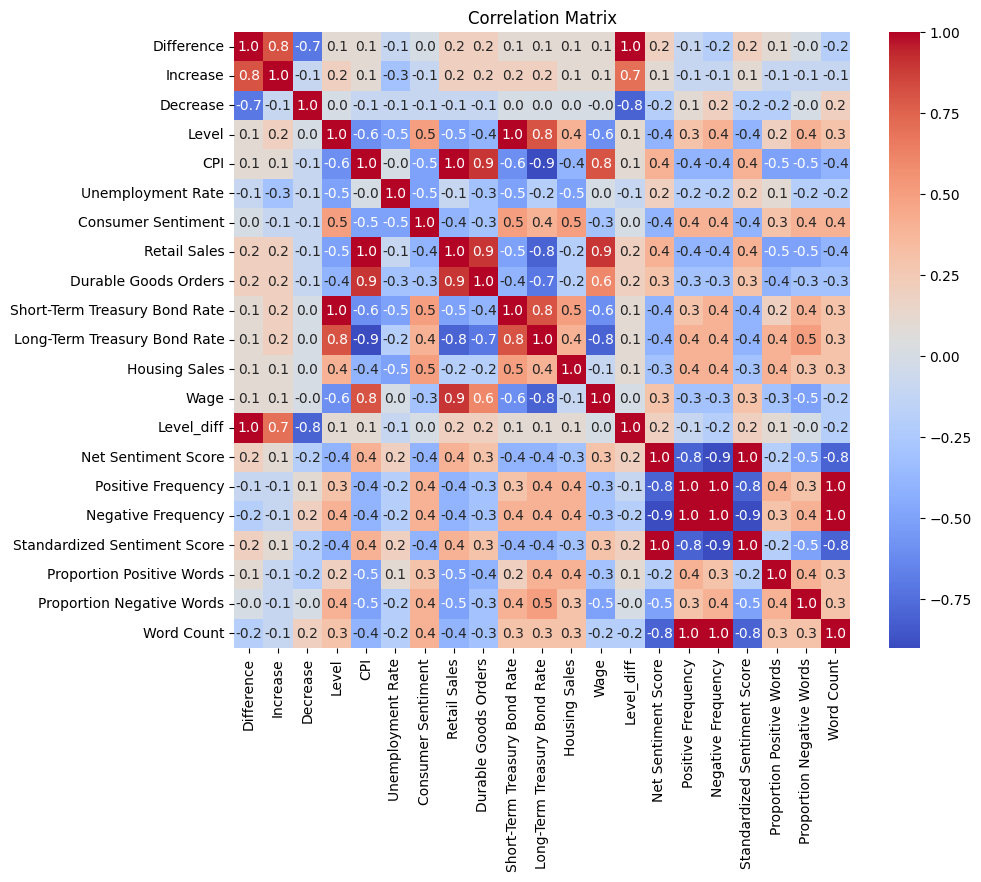

In [48]:
summary_stats = clean_data_numeric.describe(include='all')
summary_stats = summary_stats.round(1)  # Round to one decimal place
print(summary_stats)

correlation_matrix = clean_data_numeric.corr().round(1)  # Round to one decimal place
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)  # Format to one decimal place
plt.title('Correlation Matrix')
plt.show()

In [55]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values and sort them in descending order
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filter out the diagonal elements (self-correlations) and duplicate pairs
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the top 20 highest correlation coefficients
top_20_correlations = correlation_values[correlation_values >= 0.8].head(20)

# Display the filtered correlations
print(top_20_correlations)

Net Sentiment Score           Standardized Sentiment Score     1.000000
Level                         Short-Term Treasury Bond Rate    0.995643
Negative Frequency            Word Count                       0.985161
Positive Frequency            Word Count                       0.984135
CPI                           Retail Sales                     0.982122
Negative Frequency            Positive Frequency               0.980237
Difference                    Level_diff                       0.955132
Negative Frequency            Net Sentiment Score              0.897291
                              Standardized Sentiment Score     0.897291
Durable Goods Orders          Retail Sales                     0.883836
Retail Sales                  Wage                             0.866648
CPI                           Durable Goods Orders             0.862067
                              Long-Term Treasury Bond Rate     0.861441
                              Wage                             0

C:\Users\abact\AppData\Local\Temp\ipykernel_12588\1192945791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [53]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values and sort them in descending order
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filter out the diagonal elements (self-correlations) and duplicate pairs
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the top 20 correlation coefficients less than or equal to 0.20
top_20_correlations = correlation_values[correlation_values <= 0.20].head(20)

# Display the filtered correlations
print(top_20_correlations)

Positive Frequency         Unemployment Rate               0.199689
Increase                   Retail Sales                    0.198867
Durable Goods Orders       Increase                        0.194925
Level                      Proportion Positive Words       0.194572
Durable Goods Orders       Housing Sales                   0.194292
Difference                 Retail Sales                    0.194269
Durable Goods Orders       Level_diff                      0.183740
Level_diff                 Word Count                      0.183495
Proportion Negative Words  Unemployment Rate               0.183172
Decrease                   Proportion Positive Words       0.183017
Level_diff                 Negative Frequency              0.178800
Increase                   Long-Term Treasury Bond Rate    0.175984
Difference                 Negative Frequency              0.173987
Level_diff                 Retail Sales                    0.172067
Difference                 Word Count           

C:\Users\abact\AppData\Local\Temp\ipykernel_12588\2185884283.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


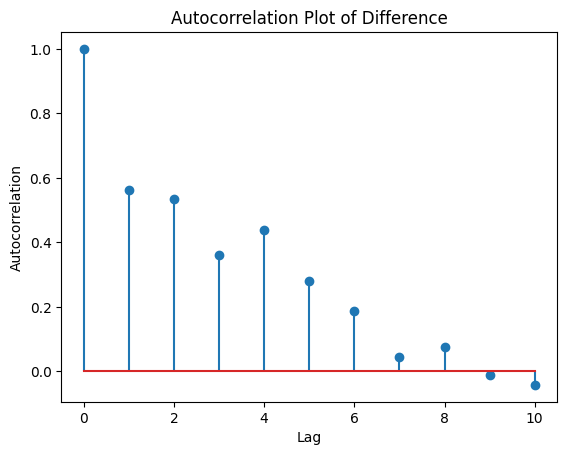

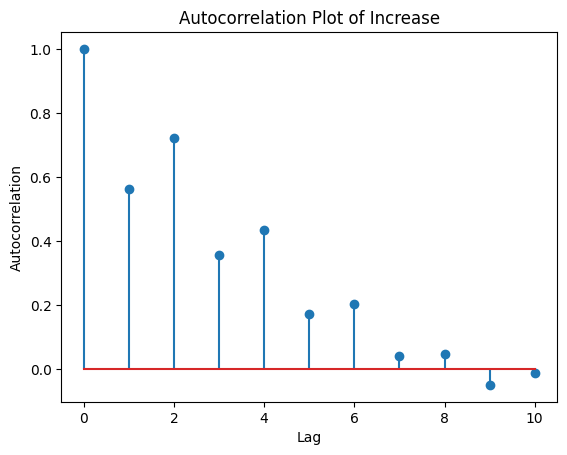

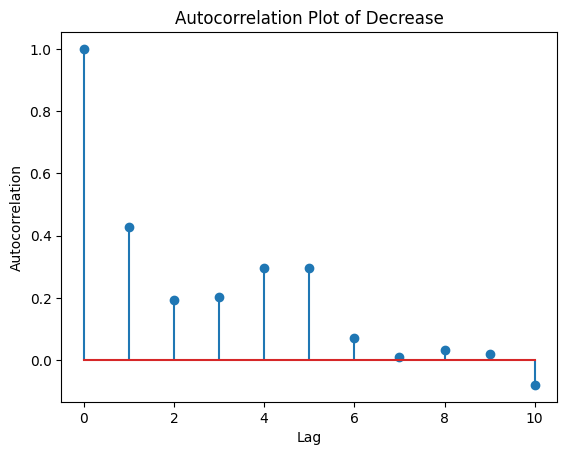

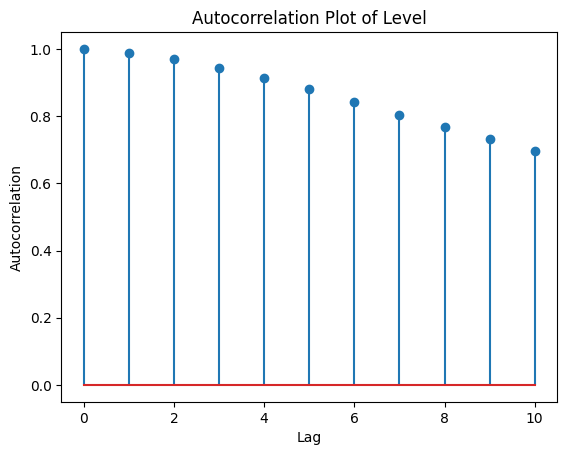

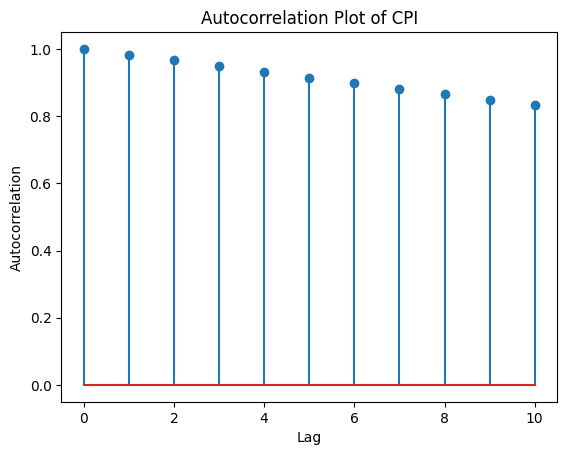

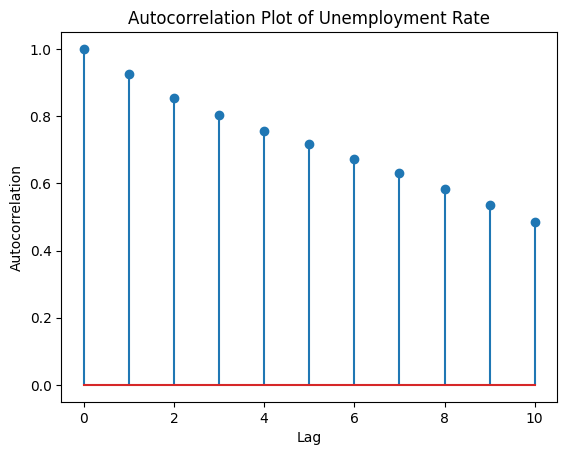

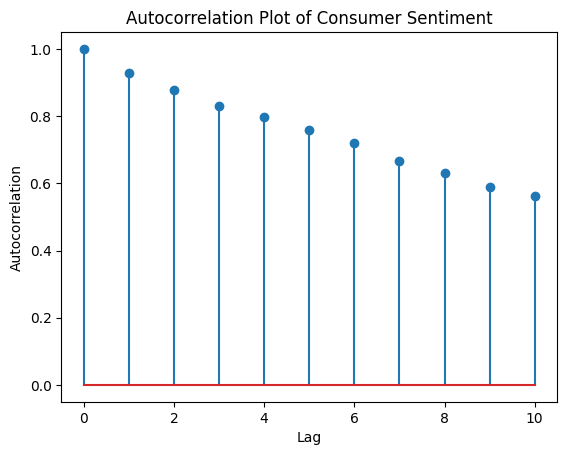

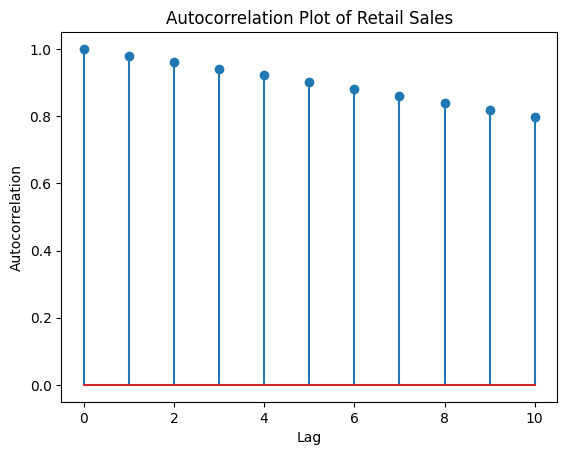

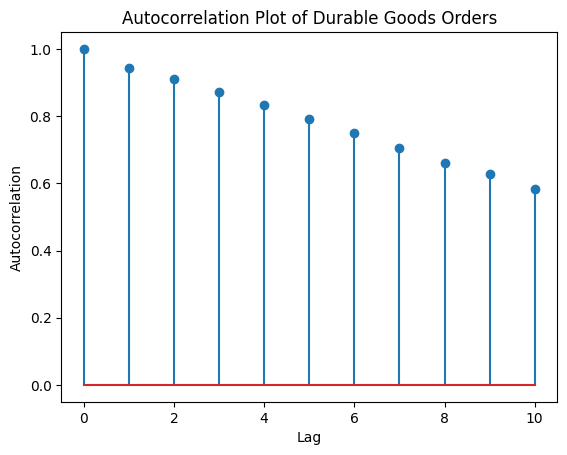

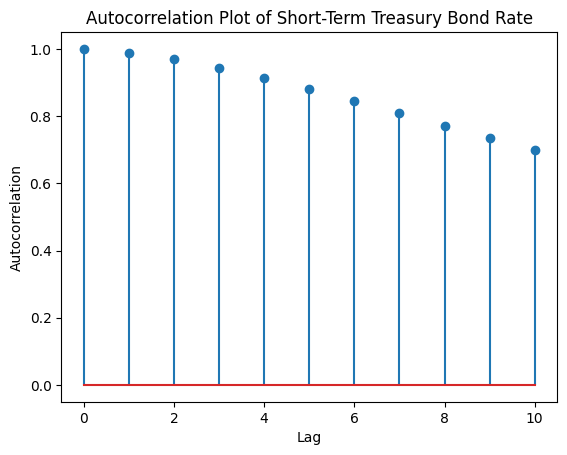

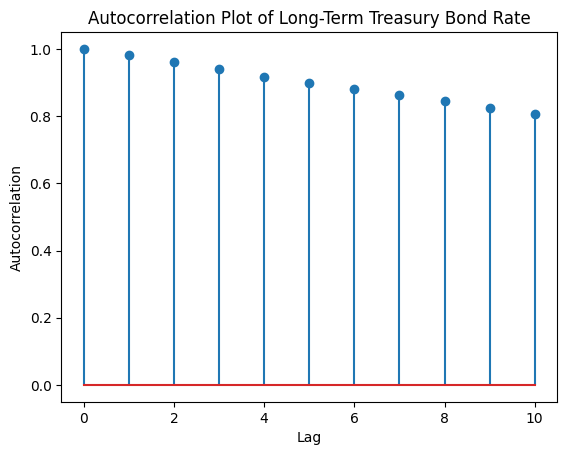

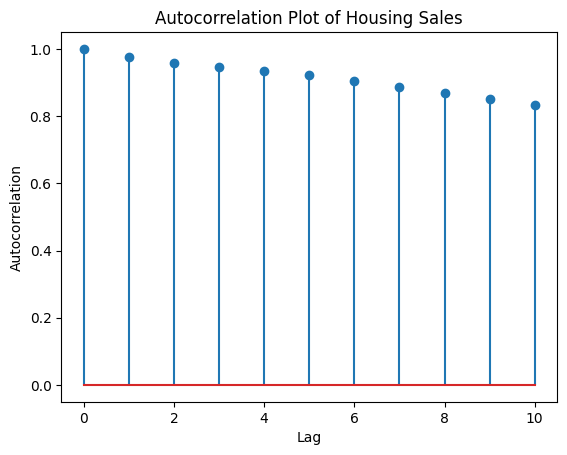

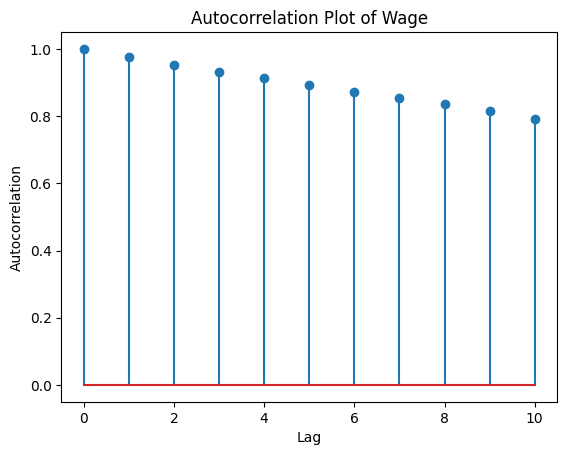

C:\Users\abact\AppData\Roaming\Python\Python310\site-packages\matplotlib\axes\_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


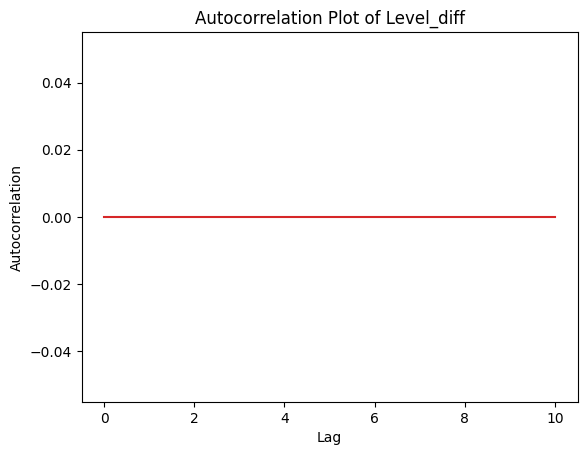

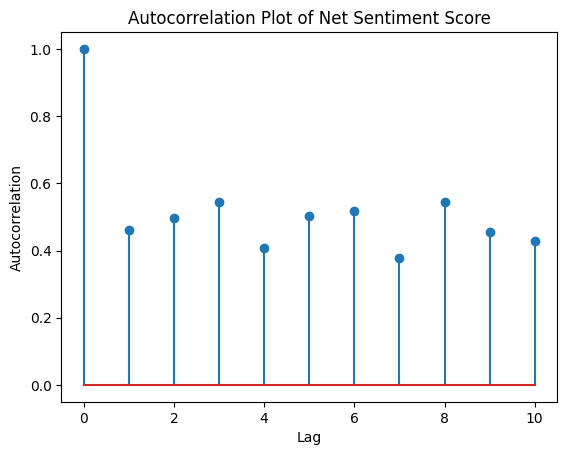

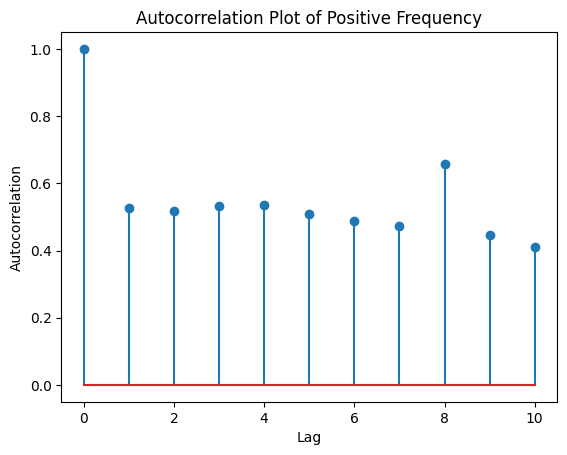

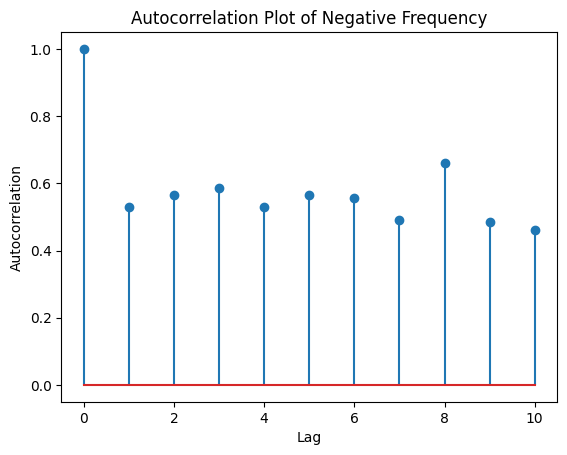

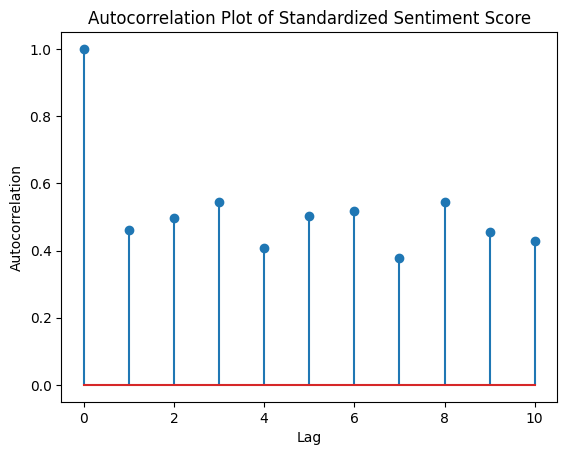

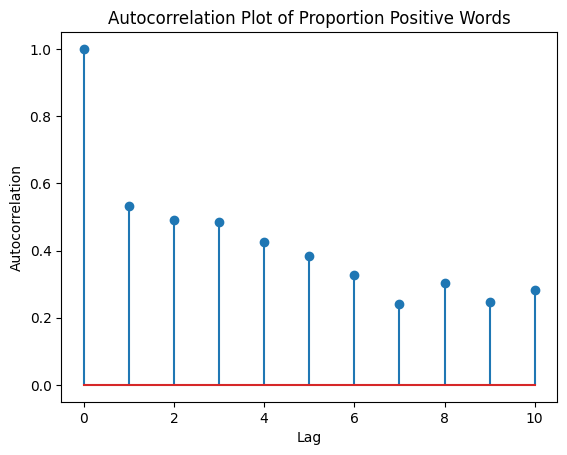

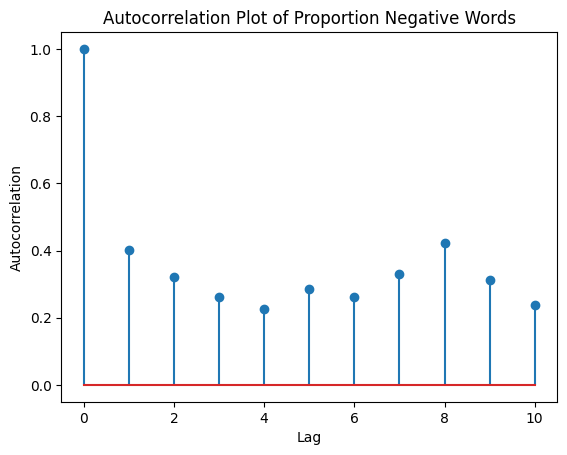

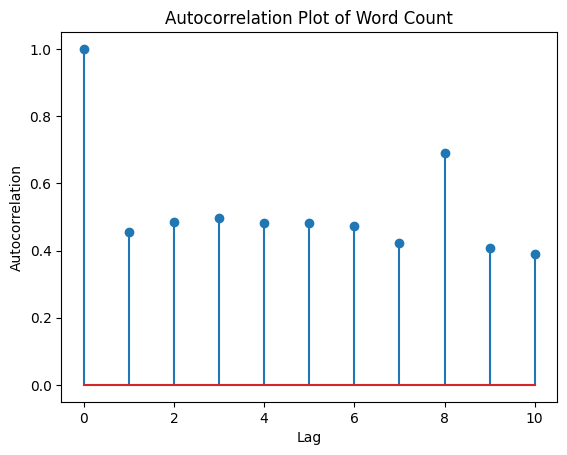

In [49]:
# Iterate over each column (excluding 'Date' and 'Sentiment Label')
for column in clean_data_numeric.columns:
    if column not in ['Date', 'Sentiment Label']:
        # Compute the autocorrelation
        acf = sm.tsa.acf(clean_data_numeric[column], nlags=10)
        
        # Plot the autocorrelation
        plt.stem(range(len(acf)), acf)
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title(f'Autocorrelation Plot of {column}')
        plt.show()

### Z-scores are an important metric when calculating skewness. Any data that has an inherent trend will need to have that trend considered before being used for causal inference, as that skewness may have an endogenous explanation of its own.

In [58]:
# Select only numeric columns
numeric_columns = clean_data_numeric.select_dtypes(include=np.number).columns

# Calculate z-scores for each numeric column in the dataset
z_scores = stats.zscore(clean_data_numeric[numeric_columns])

# Create a new DataFrame with z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns)

z_scores

z_scores_df


,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff,Net Sentiment Score,Positive Frequency,Negative Frequency,Standardized Sentiment Score,Proportion Positive Words,Proportion Negative Words,Word Count
0,-0.087984,-0.436985,-0.322882,0.577329,-1.615044,0.801039,-0.008161,-1.590190,-2.043394,0.319319,1.366268,-0.430805,-1.423190,NaN,0.481374,-0.441746,-0.475617,0.481374,-0.321090,-0.755770,-0.425466
1,-0.087984,-0.436985,-0.322882,0.577329,-1.597761,0.801039,-0.083233,-1.565212,-2.084583,0.314480,1.199149,-0.053221,-1.423190,NaN,0.590548,-0.463634,-0.526843,0.590548,1.549482,-0.506184,-0.495536
2,-0.087984,-0.436985,-0.322882,0.577329,-1.585415,0.743669,-0.391029,-1.554642,-2.005056,0.358032,1.193386,-0.240067,-1.298874,NaN,0.489993,-0.498396,-0.519392,0.489993,0.356374,0.640598,-0.508130
3,-2.319991,-0.436985,3.135538,0.344465,-1.580477,0.686299,-0.728853,-1.529885,-2.064370,0.372549,1.106945,-0.232282,-1.298874,NaN,0.398058,-0.464921,-0.465372,0.398058,0.439743,1.507427,-0.475103
4,-0.087984,-0.436985,-0.322882,0.344465,-1.568132,0.571559,-0.661288,-1.525816,-2.089157,0.358032,0.847623,0.044095,-1.174558,NaN,0.564691,-0.499683,-0.544539,0.564691,0.610424,-0.674650,-0.513593
5,-0.087984,-0.436985,-0.322882,0.344465,-1.553317,0.628929,-0.300942,-1.512677,-1.921605,0.314480,0.830334,-0.041543,-1.174558,NaN,0.550326,-0.481658,-0.526843,0.550326,1.394030,0.191205,-0.508512
6,-0.087984,-0.436985,-0.322882,0.344465,-1.543441,0.514189,-0.413550,-1.495101,-2.000003,0.396744,1.055081,0.211478,-1.174558,NaN,0.550326,-0.473934,-0.521255,0.550326,0.914155,-0.280582,-0.493843
7,-0.087984,-0.436985,-0.322882,0.344465,-1.536033,0.514189,0.569893,-1.486594,-1.771133,0.387066,1.072369,-0.372416,-1.174558,NaN,0.593421,-0.463634,-0.527774,0.593421,1.580394,-0.534856,-0.496028
8,1.028020,1.208536,-0.322882,0.344465,-1.526157,0.514189,0.487314,-1.466974,-1.809442,0.464491,1.199149,-0.111610,-1.361032,NaN,0.553199,-0.431447,-0.491451,0.553199,-0.025155,-1.275097,-0.424838
9,1.028020,1.208536,-0.322882,0.460897,-1.513812,0.399448,0.442271,-1.435146,-1.719244,0.604825,1.775421,-0.088254,-1.361032,NaN,0.464136,-0.486808,-0.502627,0.464136,-0.101872,0.303350,-0.485948


In [59]:
def calculate_z_scores(data):
    n = len(data)
    if data.dtype.kind in ['i', 'f']:  # Check if data is numeric
        observed_skewness = skew(data)
        observed_kurtosis = kurtosis(data)

        expected_skewness = 0
        expected_kurtosis = 0

        standard_error_skewness = np.sqrt(6 / n)
        standard_error_kurtosis = np.sqrt(24 / n)

        z_score_skewness = (observed_skewness - expected_skewness) / standard_error_skewness
        z_score_kurtosis = (observed_kurtosis - expected_kurtosis) / standard_error_kurtosis

        return z_score_skewness, z_score_kurtosis
    else:
        return None, None


# Calculate z-scores for skewness and kurtosis for each column in the dataset
z_scores = {}
for column in dataset.columns:
    z_score_skewness, z_score_kurtosis = calculate_z_scores(dataset[column])
    if z_score_skewness is not None and z_score_kurtosis is not None:
        z_scores[column] = (z_score_skewness, z_score_kurtosis)

# Print the z-scores for each column
for column, (z_score_skewness, z_score_kurtosis) in z_scores.items():
    print("Column:", column)
    print("Z-score for skewness:", z_score_skewness)
    print("Z-score for kurtosis:", z_score_kurtosis)
    print()

Column: Difference
Z-score for skewness: -1.4212992527218087
Z-score for kurtosis: 13.664224342868943

Column: Increase
Z-score for skewness: 16.94066205999152
Z-score for kurtosis: 23.80745531803068

Column: Decrease
Z-score for skewness: 22.610338107880775
Z-score for kurtosis: 43.59172065446449

Column: Level
Z-score for skewness: 2.4217040401168006
Z-score for kurtosis: -4.555244481654267

Column: CPI
Z-score for skewness: 1.2530884252657455
Z-score for kurtosis: -2.770282777568729

Column: Unemployment Rate
Z-score for skewness: 7.6995630719898065
Z-score for kurtosis: 3.963223785693351

Column: Consumer Sentiment
Z-score for skewness: -3.0058413902218852
Z-score for kurtosis: -1.2145942824724405

Column: Retail Sales
Z-score for skewness: 3.7436732787504514
Z-score for kurtosis: -0.39040128178682165

Column: Durable Goods Orders
Z-score for skewness: 0.4301048451112826
Z-score for kurtosis: -1.6743536988928247

Column: Short-Term Treasury Bond Rate
Z-score for skewness: 2.3287454

In [17]:
clean_data_numeric

,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Housing Sales,Wage,Level_diff,Net Sentiment Score,Positive Frequency,Negative Frequency,Sentiment Label,Standardized Sentiment Score
0,1993-02-03,0.00,0.00,0.00,3.75,143.100,7.1,86.6,156266.0,128854.0,2.93,6.26,604.0,315.0,NaN,-36,106,142,Negative,0.917201
1,1993-03-23,0.00,0.00,0.00,3.75,143.800,7.1,85.6,158979.0,127395.0,2.92,5.97,701.0,315.0,0.00,2,89,87,Positive,0.954657
2,1993-05-18,0.00,0.00,0.00,3.75,144.300,7.0,81.5,160127.0,130212.0,3.01,5.96,653.0,317.0,0.00,-33,62,95,Negative,0.920158
3,1993-07-07,-0.50,0.00,0.50,3.25,144.500,6.9,77.0,162816.0,128111.0,3.04,5.81,655.0,317.0,-0.50,-65,88,153,Negative,0.888615
4,1993-08-17,0.00,0.00,0.00,3.25,145.000,6.7,77.9,163258.0,127233.0,3.01,5.36,726.0,319.0,0.00,-7,61,68,Negative,0.945786
5,1993-09-21,0.00,0.00,0.00,3.25,145.600,6.8,82.7,164685.0,133168.0,2.92,5.33,704.0,319.0,0.00,-12,75,87,Negative,0.940858
6,1993-11-16,0.00,0.00,0.00,3.25,146.000,6.6,81.2,166594.0,130391.0,3.09,5.72,769.0,319.0,0.00,-12,81,93,Negative,0.940858
7,1993-12-21,0.00,0.00,0.00,3.25,146.300,6.6,94.3,167518.0,138498.0,3.07,5.75,619.0,319.0,0.00,3,89,86,Positive,0.955643
8,1994-02-04,0.25,0.25,0.00,3.25,146.700,6.6,93.2,169649.0,137141.0,3.23,5.97,686.0,316.0,0.00,-11,114,125,Negative,0.941843
9,1994-03-22,0.25,0.25,0.00,3.50,147.200,6.4,92.6,173106.0,140336.0,3.52,6.97,692.0,316.0,0.25,-42,71,113,Negative,0.911286


### Time plots are a good way to view trends and skewness, as well as eyeballing which variables seem to have relevance to the outcome variable and which need cleaning.

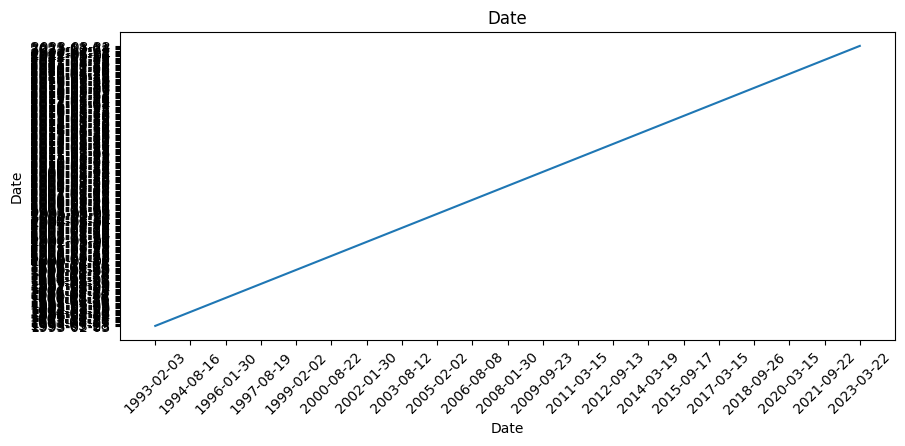

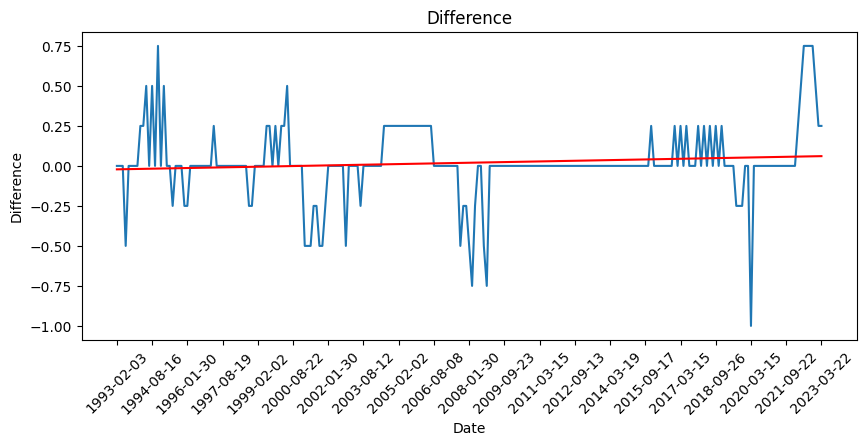

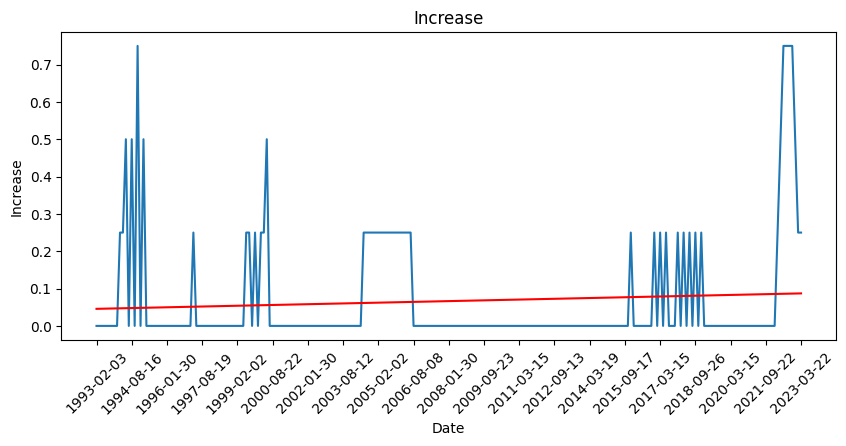

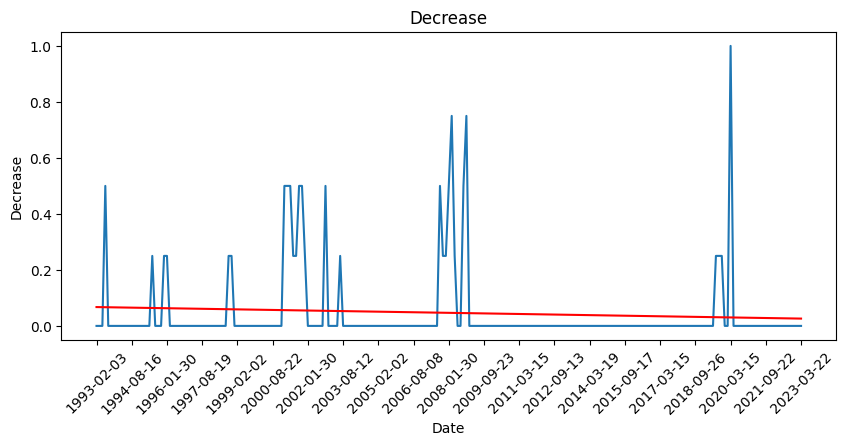

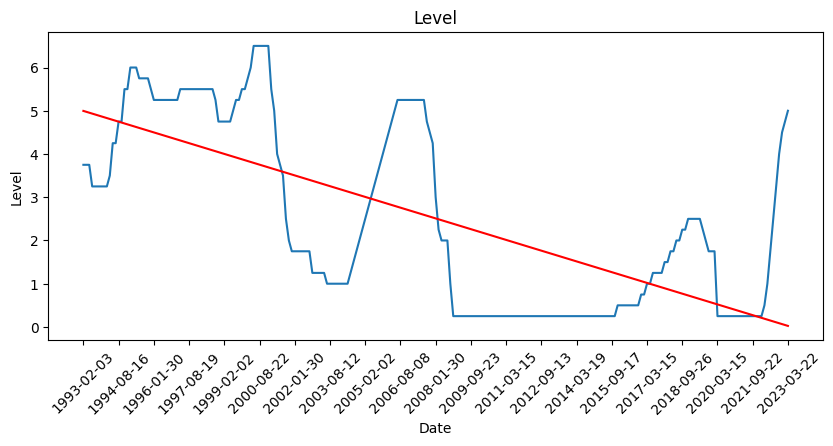

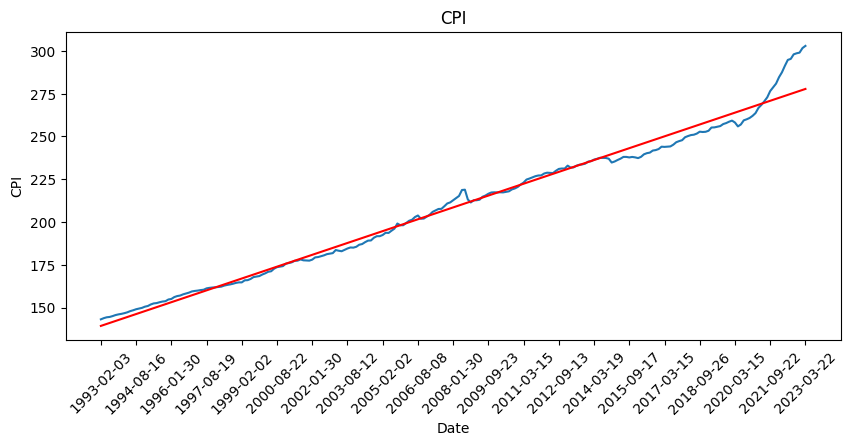

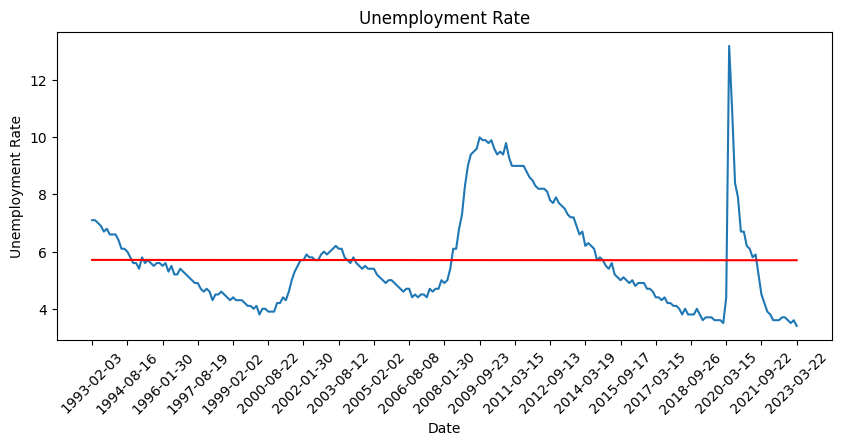

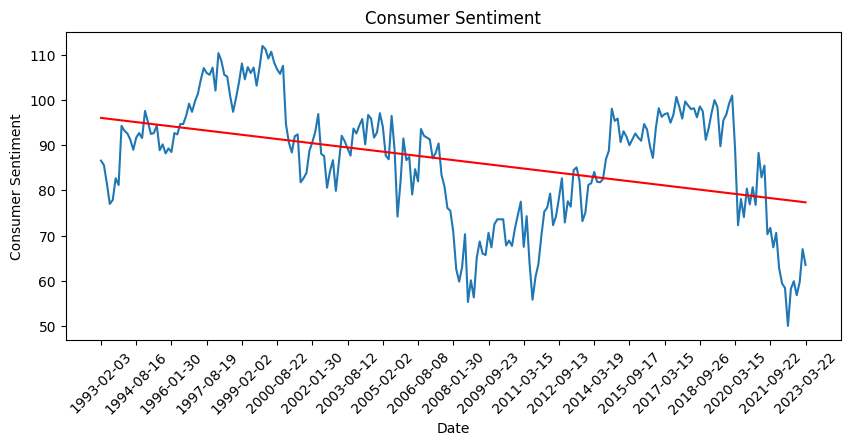

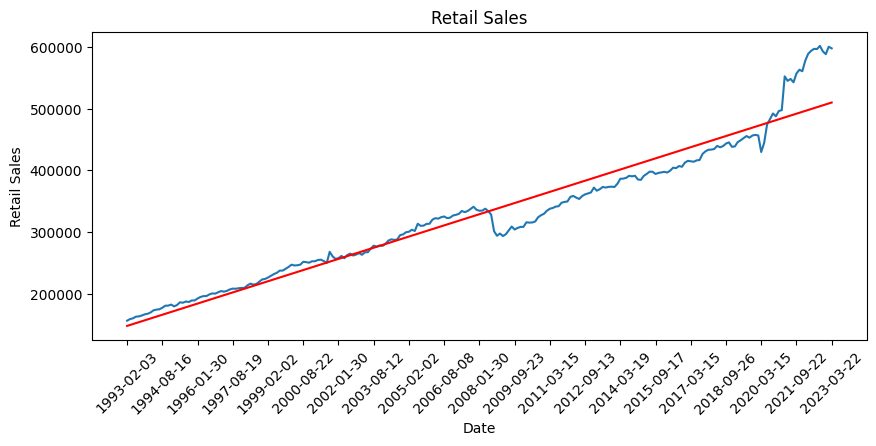

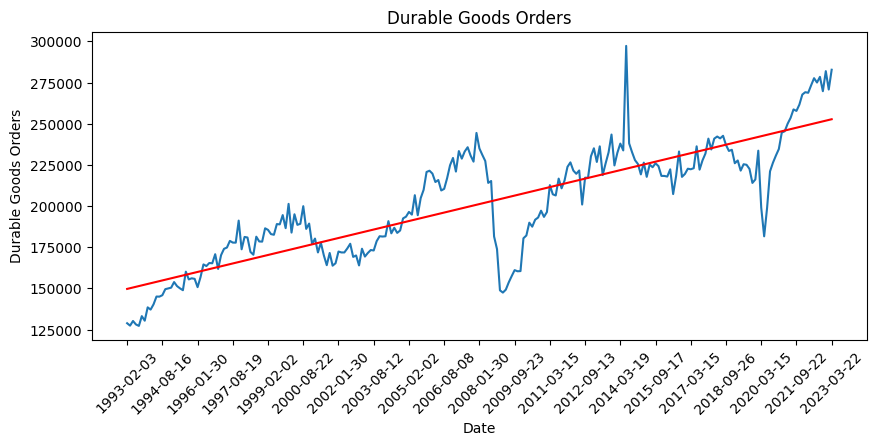

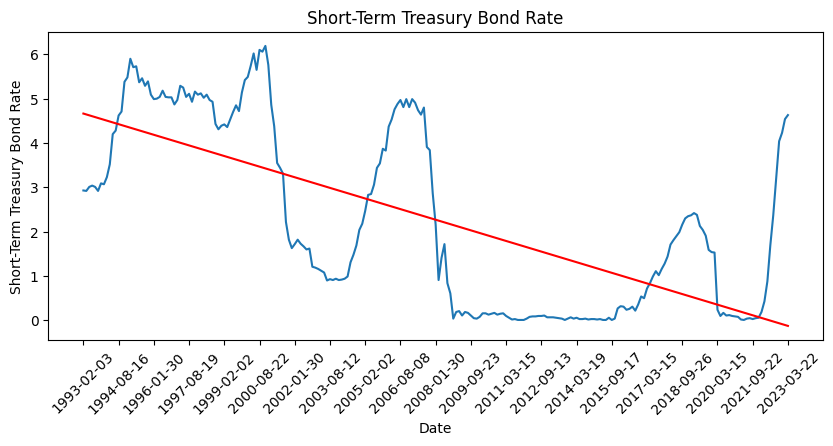

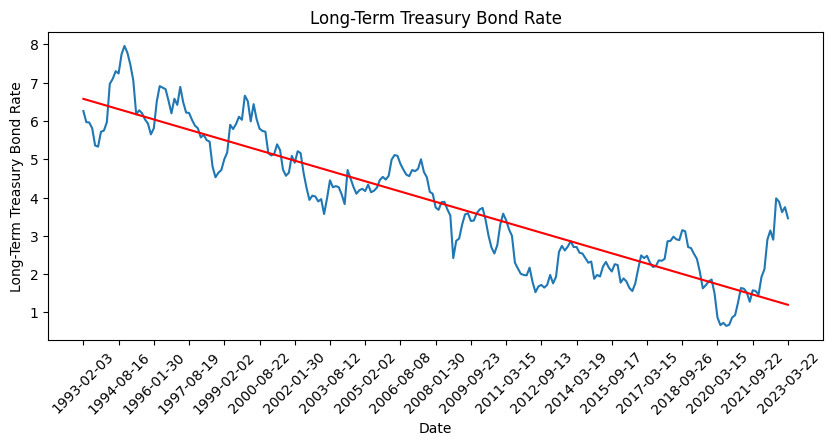

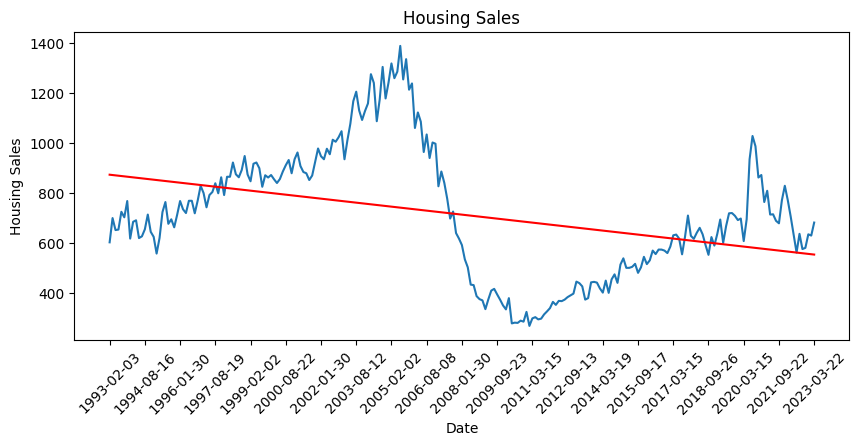

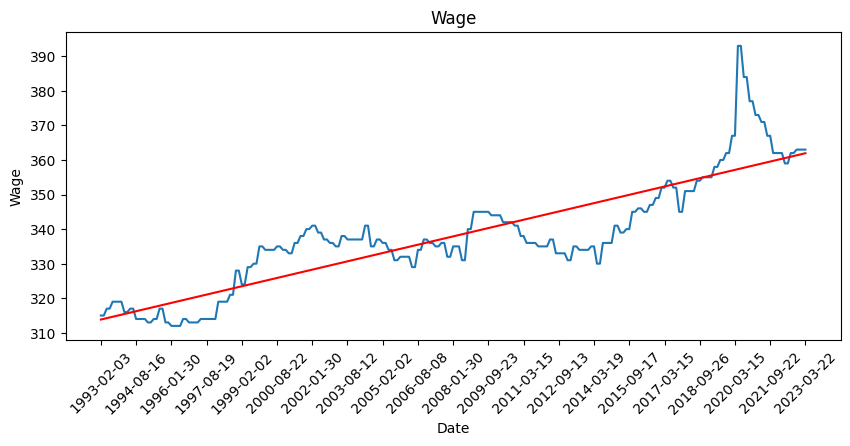

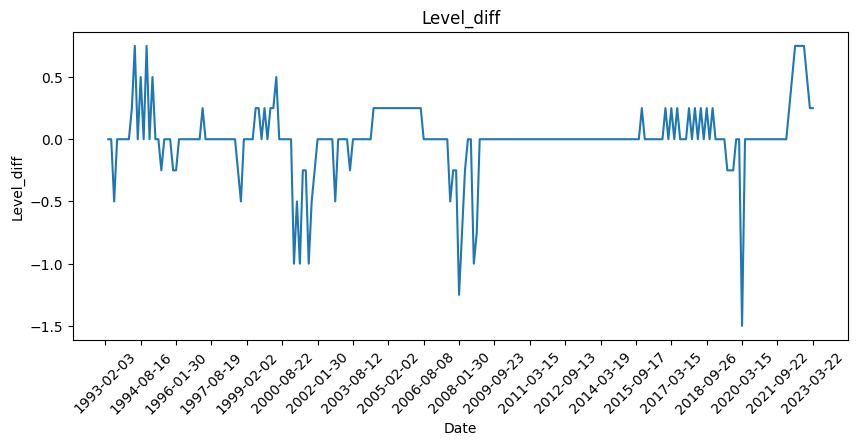

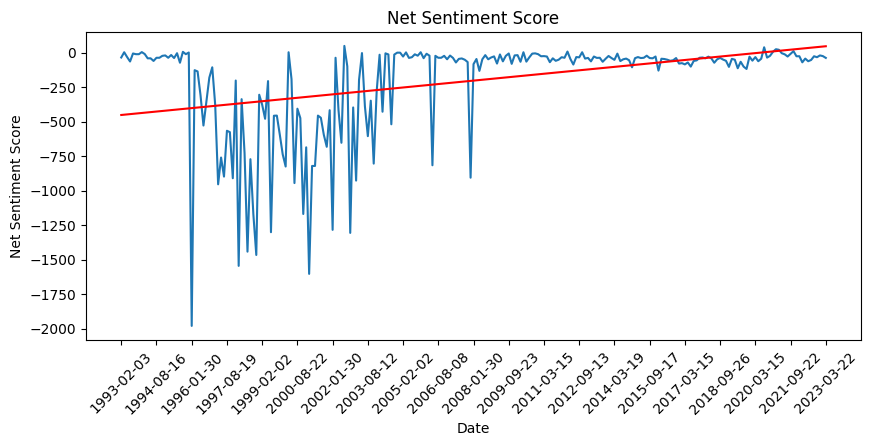

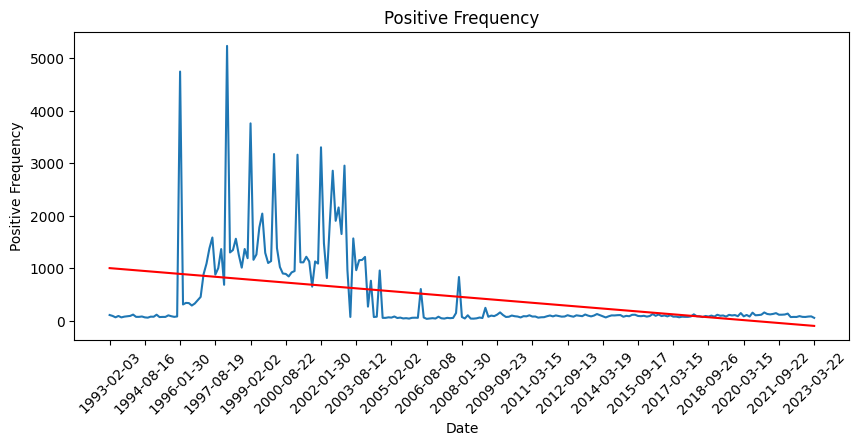

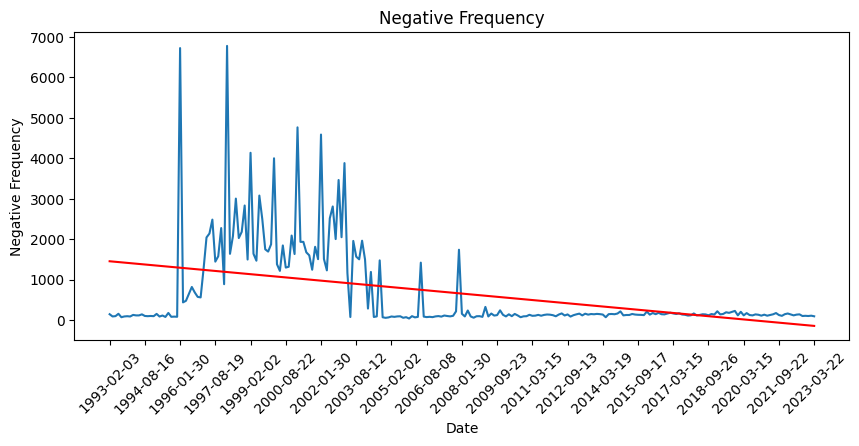

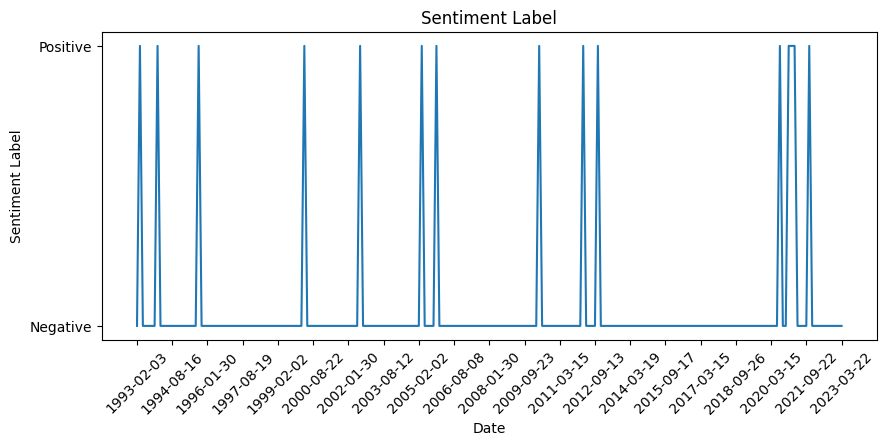

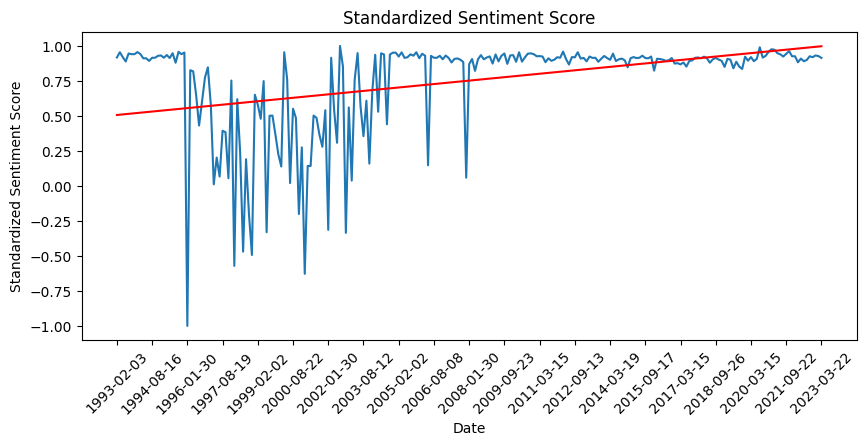

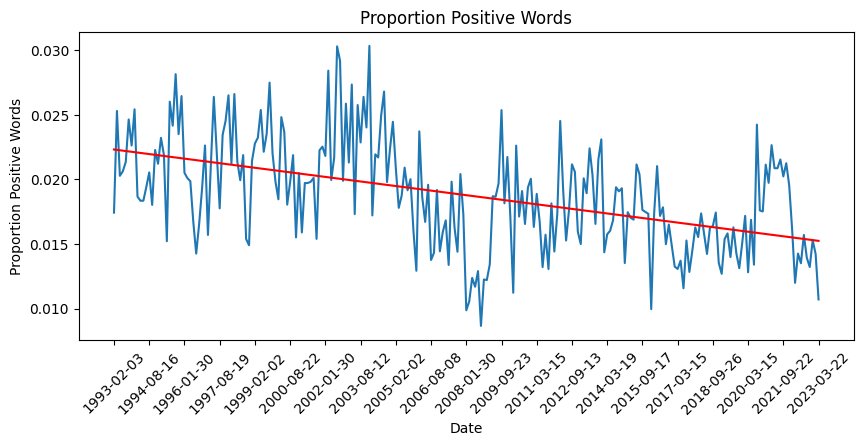

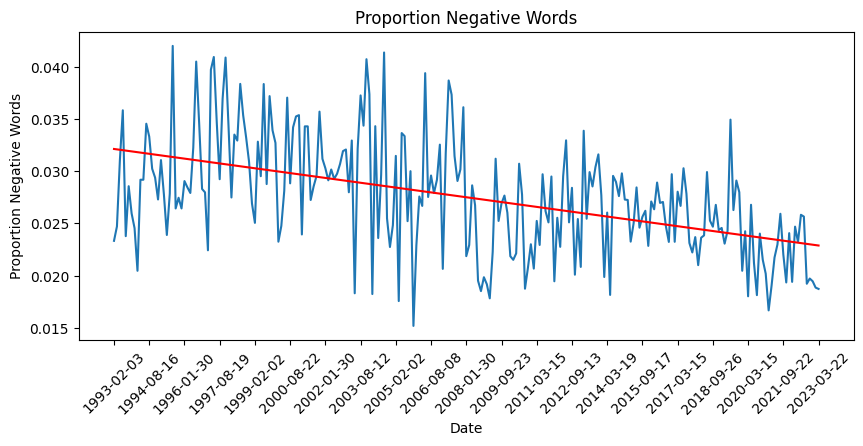

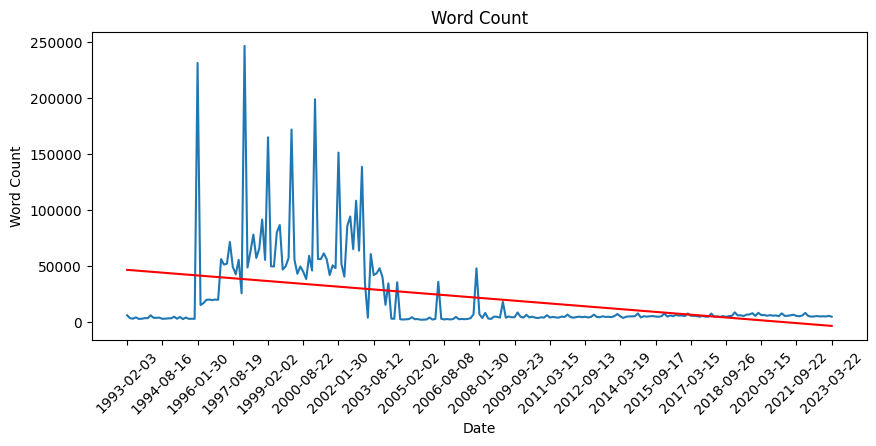

In [60]:
for column in clean_data_numeric.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(clean_data_numeric['Date'], clean_data_numeric[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(clean_data_numeric['Date'][::12], rotation=45)

    # Convert column values to numeric
    y = pd.to_numeric(clean_data_numeric[column], errors='coerce')
    
    # Calculate the line of best fit
    x = np.arange(len(clean_data_numeric['Date']))
    slope, intercept, _, _, _ = linregress(x, y)
    line = slope * x + intercept

    plt.plot(x, line, color='red')
    plt.show()

In [62]:
# Split into training, validation, and test sets
train_data, temp_data = train_test_split(dataset, test_size=0.2, shuffle=False)
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

# Verify the sizes of each set
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

train_data.to_csv(r'C:\Users\abact\BC-Project\data\train_data.csv', index=False)
temp_data.to_csv(r'C:\Users\abact\BC-Project\data\temp_data.csv', index=False)
val_data.to_csv(r'C:\Users\abact\BC-Project\data\val_data.csv', index=False)

Training set size: 192
Validation set size: 24
Test set size: 25
